**Problem statement:** To build a CNN based model which can accurately detect **melanoma**. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the **International Skin Imaging Collaboration (ISIC)**. All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:
- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

The Tensorflow flower image classification tutorial has been used for reference: https://www.tensorflow.org/tutorials/images/classification

### Importing Skin Cancer Data

### Importing all the important libraries

In [22]:
import pathlib
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print('matplotlib:',matplotlib.__version__)
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('tensorflow:',tf.__version__)
print('keras:',keras.__version__)

matplotlib: 3.2.2
numpy: 1.21.6
pandas: 1.3.5
tensorflow: 2.8.0
keras: 2.8.0


In [23]:
#Mounting google drive
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
# Defining the path for train and test images
root_path = 'gdrive/My Drive/CNN_assignment/'
data_dir_train = pathlib.Path(root_path + "Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path(root_path + "Skin cancer ISIC The International Skin Imaging Collaboration/Test")

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [26]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [27]:
?tf.keras.preprocessing.image_dataset_from_directory

In [28]:
## train dataset
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [29]:
## validation dataset
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [30]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [31]:
print('Class name distribution in Train:\n')
## testing: print('actinic keratosis',": ",len(list(data_dir_train.glob('{}/*.jpg'.format('actinic keratosis')))))
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

Class name distribution in Train:

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  357
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


In [32]:
print('Class name distribution in Test:\n')
for i in class_names:
  print(i,": ",len(list(data_dir_test.glob('{}/*.jpg'.format(i)))))

Class name distribution in Test:

actinic keratosis :  16
basal cell carcinoma :  16
dermatofibroma :  16
melanoma :  16
nevus :  16
pigmented benign keratosis :  16
seborrheic keratosis :  3
squamous cell carcinoma :  16
vascular lesion :  3


### Visualize the data
#### visualize one instance of all the nine classes present in the dataset

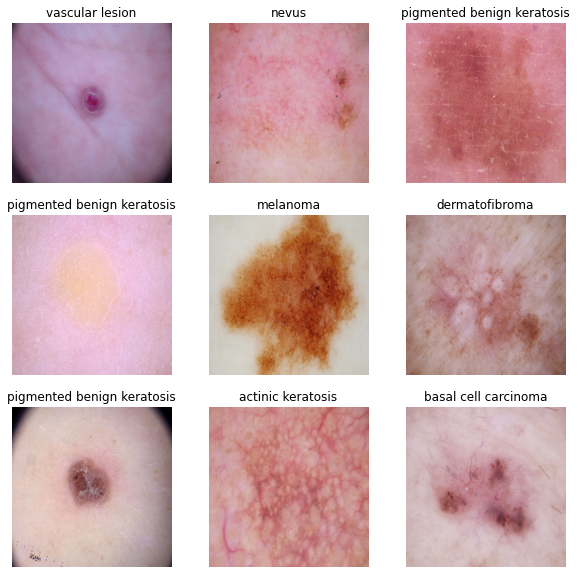

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

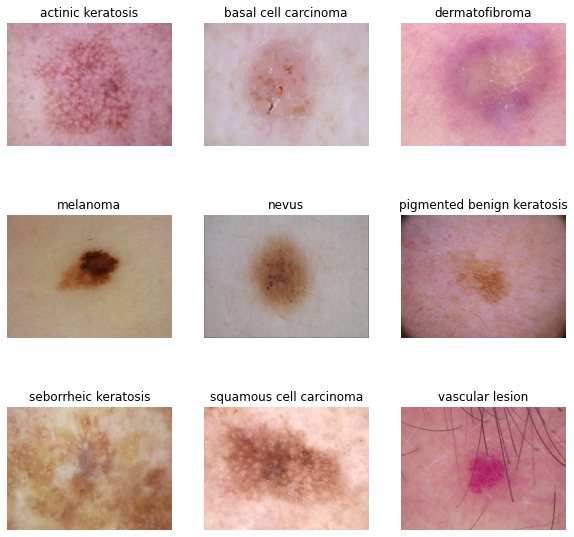

In [34]:
#roses = list(data_dir.glob('roses/*'))
#PIL.Image.open(str(roses[0]))

plt.figure(figsize=(10,10))
for index,images in enumerate(class_names):
  img=plt.imread(list(data_dir_train.glob('{}/*.jpg'.format(images)))[0])
  
  plt.subplot(3,3,index+1)
  plt.imshow(img)
  plt.title(images)
  plt.axis('off')

In [35]:
?train_ds

In [36]:
# Checking shape of image
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [38]:
# normalization_layer = layers.Rescaling(1./255)

# # There are two ways to use this layer. You can apply it to the dataset by calling Dataset.map:
# # Or, you can include the layer inside your model definition, which can simplify deployment. Let's use the second approach here.

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [39]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [40]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [42]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 76s 1s/step - loss: 1.8626 - accuracy: 0.3320 - val_loss: 1.6084 - val_accuracy: 0.4273
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5373 - accuracy: 0.4503 - val_loss: 1.4343 - val_accuracy: 0.5324
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4108 - accuracy: 0.5011 - val_loss: 1.4002 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3092 - accuracy: 0.5352 - val_loss: 1.3721 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2268 - accuracy: 0.5725 - val_loss: 1.4496 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2102 - accuracy: 0.5703 - val_loss: 1.5350 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.1131 - accuracy: 0.5926 - val_loss: 1.3897 - val_accuracy: 0.5481
Epoch 8/20
56/

### Visualizing training results

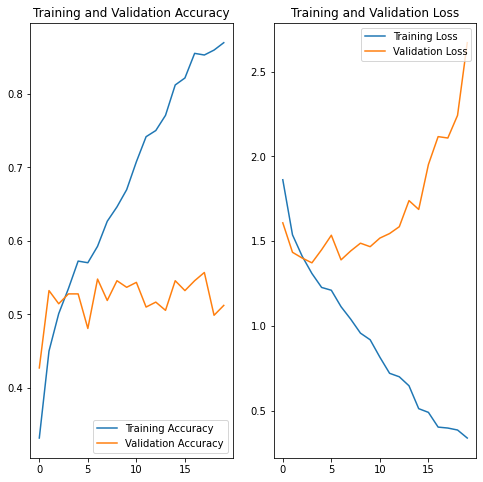

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations: 
- Training Accuracy: increases almost linearly and reached upto 0.87
- Validation Accuracy: increases abruptly and then stalls around 0.5
- Training Loss: 0.34
- Validation Loss: above 1.3 which increases to max 2.7

  Clearly a case of OVERFITTING.

### Data Augmentation
Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

Data augmentation is implemented using the following Keras preprocessing layers: tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, and tf.keras.layers.RandomZoom. These can be included inside your model like other layers, and run on the GPU.

In [44]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

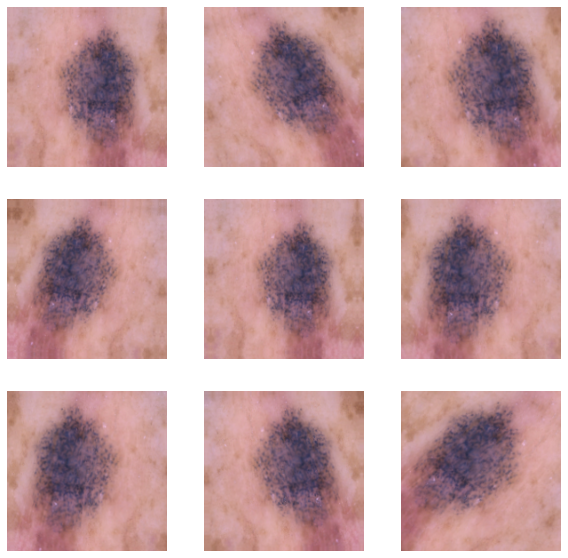

In [45]:
# Visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


### Dropout

Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [46]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

### Training the model

In [49]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 29ms/step - loss: 2.0800 - accuracy: 0.2238 - val_loss: 1.9037 - val_accuracy: 0.3937
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 1.7040 - accuracy: 0.3694 - val_loss: 1.5984 - val_accuracy: 0.4452
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5595 - accuracy: 0.4297 - val_loss: 1.4542 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4329 - accuracy: 0.4922 - val_loss: 1.6749 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4114 - accuracy: 0.5173 - val_loss: 1.3901 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3476 - accuracy: 0.5307 - val_loss: 1.4286 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2925 - accuracy: 0.5368 - val_loss: 1.3760 - val_accuracy: 0.5257
Epoch 8/20
56

### Visualizing the results

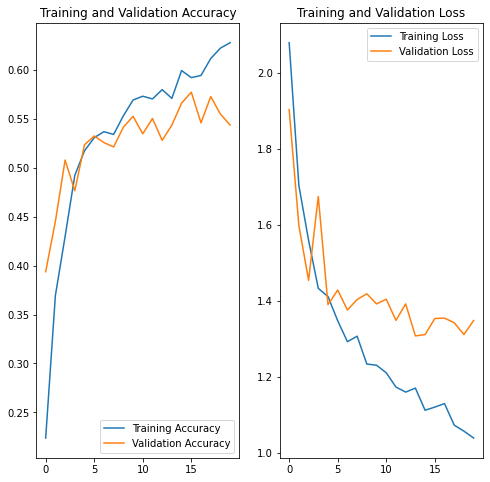

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations: 
- Training Accuracy: maxed at 0.63
- Validation Accuracy: resembles training accuracy around ~0.5
- Training Loss: has increased to 1.04 from earlier
- Validation Loss: ~1.3

  This indicates UNDERFITTING. Though validation accuracy has improved and loss decreased, training accuracy & loss have taken a hit.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [51]:
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  357
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


<BarContainer object of 9 artists>

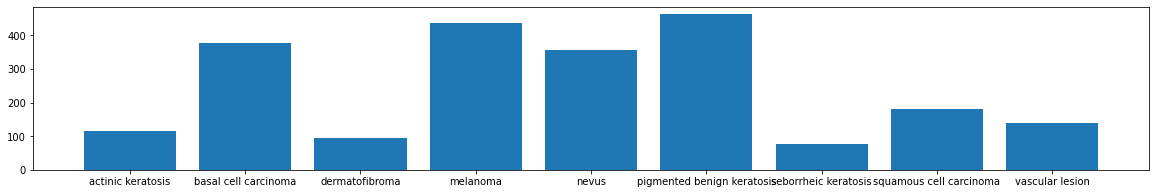

In [52]:
# Visualizing distribution
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(20,3))
plt.bar(class_names,count)

#### **Observations:**  
- Least number of samples: seborrheic keratosis :  77
- Classes which dominate the data in terms proportionate number of samples:
  1. pigmented benign keratosis :  462
  2. melanoma :  438
  3. basal cell carcinoma :  376
  4. nevus :  357


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [53]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [54]:
    path_list=[]
    lesion_list=[]
    for i in class_names:
          for j in data_dir_train.glob(i+'/*.jpg'):
            path_list.append(str(j))
            lesion_list.append(i)
    dataframe_dict_original = dict(zip(path_list, lesion_list))
    original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
    original_df

,Path,Label
0,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,actinic keratosis
1,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,actinic keratosis
2,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,actinic keratosis
3,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,actinic keratosis
4,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,actinic keratosis
...,...,...
2234,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,vascular lesion
2235,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,vascular lesion
2236,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,vascular lesion
2237,gdrive/My Drive/CNN_assignment/Skin cancer ISI...,vascular lesion


In [55]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F973031E9D0>: 100%|██████████| 500/500 [00:09<00:00, 54.61 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F97303ABFD0>: 100%|██████████| 500/500 [00:10<00:00, 47.74 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F989F7D9C10>: 100%|██████████| 500/500 [00:10<00:00, 46.71 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=824x719 at 0x7F973032A390>: 100%|██████████| 500/500 [00:49<00:00, 10.19 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F9762FC7850>: 100%|██████████| 500/500 [00:36<00:00, 13.54 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F976290BF90>: 100%|██████████| 500/500 [00:09<00:00, 55.26 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F976BD1EE50>: 100%|██████████| 500/500 [00:20<00:00, 24.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9762598CD0>: 100%|██████████| 500/500 [00:09<00:00, 54.80 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F97303FB750>: 100%|██████████| 500/500 [00:09<00:00, 51.93 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [56]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [57]:
import os
import glob
from glob import glob

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029915.jpg_2461ebcb-cb54-4f7f-9f85-e99bc0527c2d.jpg',
 'gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027650.jpg_75780302-8171-4578-9e54-15b4815563cf.jpg',
 'gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028854.jpg_20ee362c-a6b2-49c2-87c7-bee299e1c76b.jpg',
 'gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025957.jpg_1d79d564-f06d-4c27-80db-def606bf80c7.jpg',
 'gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_orig

In [58]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [59]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [60]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [61]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [62]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [63]:
augmented_data_dir = data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_data_dir,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [64]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_data_dir,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [65]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Rescaling, InputLayer

# Include BatchNormalization, Dropout
model_norm=Sequential()

model_norm.add(InputLayer((180,180,3)))
model_norm.add(Rescaling(1./255))

model_norm.add(Conv2D(32, (3, 3), padding='same'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))

model_norm.add(MaxPooling2D(pool_size=(2, 2)))

model_norm.add(Conv2D(64, (3, 3)))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))


model_norm.add(MaxPooling2D(pool_size=(2, 2)))
model_norm.add(Dropout(0.25))

model_norm.add(Flatten())
model_norm.add(Dense(512, activation='relu'))
model_norm.add(Dense(256, activation='relu'))
model_norm.add(Dropout(0.25))

model_norm.add(Dense(9, activation='softmax'))


# View the summary of all layers
model_norm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 88, 88, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [66]:
#choose an appropirate optimiser and loss function
model_norm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [67]:
epochs = 50
history = model_norm.fit(
  train_ds,
  validation_data=val_ds ,
  epochs=epochs,
)

Epoch 1/50
169/169 [==============================] - 25s 139ms/step - loss: 8.0814 - accuracy: 0.2580 - val_loss: 2.2423 - val_accuracy: 0.1507
Epoch 2/50
169/169 [==============================] - 20s 112ms/step - loss: 1.8147 - accuracy: 0.2880 - val_loss: 2.0960 - val_accuracy: 0.2086
Epoch 3/50
169/169 [==============================] - 20s 116ms/step - loss: 1.6688 - accuracy: 0.3492 - val_loss: 1.6839 - val_accuracy: 0.3719
Epoch 4/50
169/169 [==============================] - 20s 115ms/step - loss: 1.6361 - accuracy: 0.3563 - val_loss: 1.5184 - val_accuracy: 0.4647
Epoch 5/50
169/169 [==============================] - 20s 115ms/step - loss: 1.5517 - accuracy: 0.3874 - val_loss: 1.6174 - val_accuracy: 0.4180
Epoch 6/50
169/169 [==============================] - 20s 117ms/step - loss: 1.5585 - accuracy: 0.3722 - val_loss: 1.7975 - val_accuracy: 0.3571
Epoch 7/50
169/169 [==============================] - 20s 114ms/step - loss: 1.4484 - accuracy: 0.4186 - val_loss: 2.6182 - val_ac

#### **Todo:**  Visualize the model results

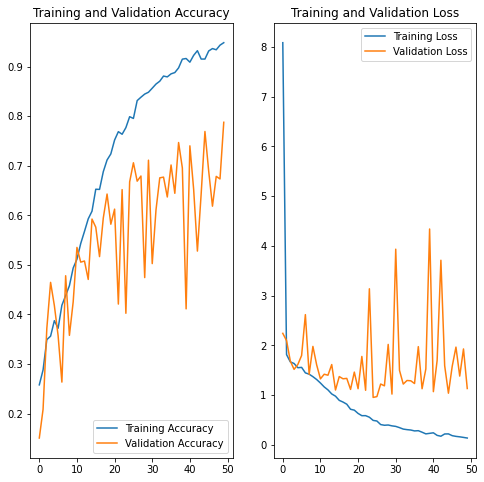

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations: 
- Training Accuracy: significant improvement to 0.95
- Validation Accuracy: improvement - reached 0.79
- Training Loss: has decreased to 0.14
- Validation Loss: ~1.1

  Using  class rebalance, droupout, batch normalization, augmentation have improved results, still the model is OVERFITTING.


### Conclusion:
There is significant improvement from Model 1 to Model 3:

- Model 1: Simple CNN Model: OVERFITTING
  </br>Accuracy: 0.87 | Validation accuracy : ~0.5

- Model 2: Data Augment with Dropout: UNDERFITTING
  </br>Accuracy: 0.63 | Validation accuracy : ~0.5

- Model 3: Class rebalance,BatchNormalization with Dropout: OVERFITTING
  </br>Accuracy: 0.95 | Validation accuracy : 0.79